In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

In [3]:
folders = os.listdir('/content/drive/MyDrive/test')

In [4]:
folders

['Vasculitis Photos',
 'Vascular Tumors',
 'Systemic Disease',
 'Urticaria Hives',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Atopic Dermatitis Photos',
 'Acne and Rosacea Photos']

In [5]:
path = '/content/drive/MyDrive/test/'
for i in folders:
  print(i, len(os.listdir(path+i)))

Vasculitis Photos 105
Vascular Tumors 121
Systemic Disease 152
Urticaria Hives 53
Cellulitis Impetigo and other Bacterial Infections 73
Atopic Dermatitis Photos 123
Acne and Rosacea Photos 312


In [6]:
import keras.utils as image
import matplotlib.pyplot as plt

In [7]:
img = image.load_img('/content/drive/MyDrive/test/Acne and Rosacea Photos/07PerioralDermEye.jpg')


In [8]:
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [9]:
img = image.img_to_array(img)/255

In [10]:
img.shape

(472, 720, 3)

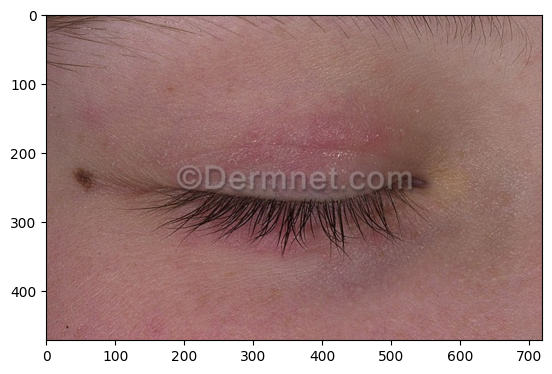

In [11]:
plt.imshow(img)
plt.show()

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_set = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

In [14]:
train_gen = train_set.flow_from_directory(path,
                                         target_size = (224, 224),
                                         batch_size = 40,
                                         class_mode = 'categorical')

Found 939 images belonging to 7 classes.


In [15]:
for i, j in train_gen:
    print(i.shape, j.shape)
    break

(40, 224, 224, 3) (40, 7)


[0. 0. 0. 0. 0. 0. 1.]


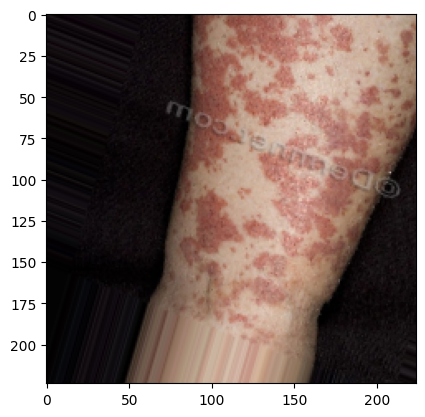

In [16]:
plt.imshow(i[21])
print(j[21])

In [17]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np

In [18]:
base_model = ResNet50(weights='imagenet', include_top = False, input_shape = (224, 224, 3))

In [19]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [20]:
for layer in base_model.layers:
    layer.trainable = True

In [21]:
output = base_model.output
output = GlobalAveragePooling2D()(output)
output = Dense(7, activation = 'softmax')(output)

In [22]:
model = Model(inputs = base_model.input, outputs = output)

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [24]:
import tensorflow as tf
from tensorflow.keras import optimizers
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer = 'adam', metrics = ['accuracy'])

In [25]:
hist = model.fit_generator(train_gen, epochs = 15)

<ipython-input-25-56cb51bf8221>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_gen, epochs = 15)


Epoch 1/15
24/24 [==============================] - 743s 30s/step - loss: 2.1443 - accuracy: 0.3333
Epoch 2/15
24/24 [==============================] - 705s 29s/step - loss: 1.7481 - accuracy: 0.3600
Epoch 3/15
24/24 [==============================] - 709s 29s/step - loss: 1.6659 - accuracy: 0.3983
Epoch 4/15
24/24 [==============================] - 727s 31s/step - loss: 1.5739 - accuracy: 0.4388
Epoch 5/15
24/24 [==============================] - 721s 30s/step - loss: 1.5005 - accuracy: 0.4622
Epoch 6/15
24/24 [==============================] - 711s 30s/step - loss: 1.5509 - accuracy: 0.4473
Epoch 7/15
24/24 [==============================] - 704s 29s/step - loss: 1.4275 - accuracy: 0.4984
Epoch 8/15
24/24 [==============================] - 705s 29s/step - loss: 1.4466 - accuracy: 0.4824
Epoch 9/15
24/24 [==============================] - 736s 30s/step - loss: 1.3353 - accuracy: 0.5240
Epoch 10/15
24/24 [==============================] - 730s 30s/step - loss: 1.2695 - accuracy: 0.5442

In [26]:
hist.history

{'loss': [2.1443450450897217,
  1.7480794191360474,
  1.6659165620803833,
  1.5738630294799805,
  1.5004665851593018,
  1.550942063331604,
  1.4274617433547974,
  1.446632742881775,
  1.335252285003662,
  1.269533634185791,
  1.2851073741912842,
  1.1609933376312256,
  1.1744372844696045,
  1.1003762483596802,
  1.0392416715621948],
 'accuracy': [0.3333333432674408,
  0.35995739698410034,
  0.398296058177948,
  0.43876463174819946,
  0.4621938169002533,
  0.4472843408584595,
  0.49840256571769714,
  0.48242810368537903,
  0.5239616632461548,
  0.5441959500312805,
  0.5356762409210205,
  0.5697550773620605,
  0.5910543203353882,
  0.5974441170692444,
  0.6517571806907654]}

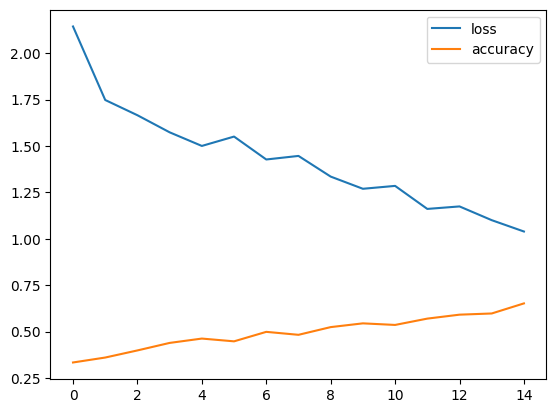

In [27]:
plt.plot(hist.history['loss'], label = "loss")
plt.plot(hist.history['accuracy'], label = "accuracy")
plt.legend()
plt.show()